This NoteBook Is Part of the Ongoing Alterus Vera Assignment

<h1>Alternus Vera - Final Version - Hyunwook Shin</h1>

November 25, 2018
012507417

Link to the main group notebook from previous week(s):

https://colab.research.google.com/drive/1bOoY6V0ytxSigKuZ6lJntNWJJcTM_6wU#scrollTo=ebnN4ikZzQtu

## Hyunwook Shin (James)

## 1 Introduction

I will be focusing on the two main features, namely **event coverage** (initially recency) and **political spectrum**,  which are factors in determining if the news is genuine or fake news, as shown below:

| Factor | Explanation|
| -- | -- |
| Coverage of the latent event from outside sources  | Level of coverage regarding the latent event or topic  | 
| Political Bias | number from 0 to 10 where 0 is central/neutral and 10 is partisan (left/right) |

The event coverage is the factor I put my most personal effort in, covering all areas of distillation (preprocessing, LDA, sentiment analysis) and generating resultant csv files for generating polynomial equation. Politicial bias factor was also researched as part of bonus/extra study.


High level overview with diagrams are available under the following lin:

https://drive.google.com/file/d/1Pys9cj0_NlZdIH3Jwz6lA4FPAPujx54B/view?usp=sharing


### 1.1 Contribution - Team

- Sy Le (006088940) : data import and wrangling, tokenization, remove stopwords, remove stemmings
- Mojdeh Keykhanzadeh(008129589) : remove punctuation , apply ngrams,researched about IBM Faireness
- **Hyunwook Shin (012507417) : Coverage Score and Political Bias/Spectrum Analysis, Data enrichment:
  all news dataset (50K+ articles), political messages dataset (LDA, TF-IDF, MultinomialNB)**
- Lin Cheng (012484459) : Use TF-IDF Vectorizer + SVD to produce a matrix, and apply Logistic Regression on it
- Yu Xu (012502048): Explored ways to gather topics from the dataset. Explored tf-idf ranking. Explored pipeline + GridSearch for the best n_component of LDA for logistic regression

### 1.2 Contribution - Notebook

The following notebook is prepared by Hyunwook Shin. 

### 1.3 Motivations

The main motivation behind **event coverage** is the hypothesis that there is a positive corelation between outside coverage of the latents event depicted in the article and the creditbility and ultimately truthfulness of the article as a whole.  In other words, the more news sources (outside the article) talk about the same event, the more credible the article is as a whole. Some fake news are designed to confuse audiences and make them lose trust in reliable news (Shu et al, 2017). 

We as readers do this from day to day when we read sensational or eye-catching articles. When we read an article about a topic we think is "too good to be true", we cross-check with other news websites under Google News or Twitter to read up on the event or topic. This is backed by the idea that there are fake users and bot account purposely desigend to spread false stories (Shu et al., 2017).  **Through tips and advice on slack, just because there are ample number of coverage on some topic, it does not necessarily mean that the particular article in question is a reliable (non-fake news).** (Arsanjani, 2018). This factor should be used in conjunction with other factors such as "bias", "sensationalism", and "social media activites" to further reduce the impurity of the classifications. We can treat this factor as an intermediary step to be factored early in the process to remove True Positives.

This leads to a next interesting feature to study. The motivation behind the **political bias** is the hypothesis that the articles that are neutral (or centrist) have higher probability of being truthful compare to articles that are to the far ends of the spectrums (either right-wing or left-wing). Compared to event coverage, I believe political bias as a factor has a greater impact on determining whether the article is fake or not.

<img src="https://images.pexels.com/photos/1327218/pexels-photo-1327218.jpeg?cs=srgb&dl=alone-casual-couch-1327218.jpg&fm=jpg" width=200px>



### 1.4 Definitions

We shall define the  following terms as follows:

* **coverage**  - number of news from media outlet that covered the same event or latent topic depicted in the article, within a fixed time window. There is a fixed window of time 1 month (coverage 30) and 2 months (coverage 60) before and after the article was published.

* **political bias** - is a rubric indicating a range from 0 to 3 where 0 is centrist affiliation and 3 is left-most or right-most affiliation. Alternative model would be -10 indicating the left-most affiliation and 10 being the right-most affiliation. We simply rectify this model and only work in the range (0 to 10) with 10 being most politically biased (partisan).

| 0 | 1 | 2 | 3 |
| -- | -- | -- | -- |
| Centrist/Neural | Slightly Partisan | Partisan | Strongly Partisan |





### 1.5  Scope

To summarize the document will focus on:

1. Introduction
2. Methods and Approaches
3. Importing Data including Data Enrichment
4. Other Preliminary Requirements
5. Distillation Function Code Reuse and Refactored Code
6. Topic Modeling and LDA Analysis
7. New Coverage Factor using Word2Vec and Random Forrest Classifier
8. Political Spectrum using TF-IDF and Classifiers

### 1.6 Estimated Run time (GPU)

- Sections  1 ~ 7 : 40 minutes
- Secttion 8: 10 ~ 20 minutes
- Section 9: ~ 30 minutes

## 2 Method
  
 After the necessary distillation , the goal is to create approximate scores for recency and political spectrum. 
 



 ### 2.1 News Coverage
 * **Coverage** We first use topic modeling to find the key latent topics. Then we use a separate dataset called "All the news" dataset to see if there are other  articles covering a similar event. It is important to note that we are *not* cross-checking factual claims made in the article, but rather checking to see if a related and latent topic can be found in other news sources. If there are no external coverage for the event/topic, chances are that the article in question is likely a fake news. However, just because there are sufficient coverage during the time frame, it does not necessarily mean that the news is completely reliable.
  


### 2.2 Political Spectrum

* **Political spectrum**  Use enrichment dataset. Downlaod a dataset that maps texts to political bias. It is important to note that the spectrum ranges from neutral to partisan (not democratic to republican) as political views can be multipolar comprised of more than two views on the subject. Neutral view would be an objective and fair assessment of the subject discussed. A partisan view is a view that is backed by political ideology, agenda, or combination of both.


### 2.3 Alternative Methods Tried

I have explored NewsAPI which provdes a limited access to its internal databases. NewsAPI in particular allows you to provide a search keywords, and it gives you the relevant news articles related to that keywords. I have created an account with NewsAPI, but soon realized based on the calulations, the rate limiting policy of the API would not allow my ML project to complete in a reasonable time. Thefore, instead of using an API, I decided to download a new dataset from Kaggle (See Section 3.3)

* NewsAPI https://newsapi.org/
* Google Trends API

## 3 Data Preprataions


### 3.1 Main Dataset

For the purpose of this study, we will focus on the Kaggle's Liar Dataset (Risdal, 2016) The main benefit of Kaggle's Liar Dataset is the text entry that is included with the headline.

https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle

### 3.2 Code For Downloading and Distillation

The code for downloading dataset and distillation. written by other team members from the last week, are borrowed, and refactored for the purposes of this week's assignment. While same distillation functions can be applied for most features, it is best to customize it and tailor it to the needs of the two features covered in this portion of the assignment.




### 3.3 Data Enrichment

We have use two main datasets to be used for data enrichment:

<b>Dataset 1</b> - All The News (Thompson, 2017)
- Original: https://www.kaggle.com/snapcrack/all-the-news
- Copy: https://github.com/h7shin/all_news_dataset_kaggle

The above data is useful for analyzing coverage report of non-fake news articles
curated from mainstream news media sites.

<b>Dataset 2</b> - Political Social Media Posts (Eight, 2016).
- Original: https://www.kaggle.com/crowdflower/political-social-media-posts
- Copy: https://github.com/h7shin/political_social_media

The above data is useful to identify bag of words translated to the
political spectrum.

In [0]:
# For caculating approximate time to process notebook (IGNORE)
import datetime
datetime.datetime.now()

datetime.datetime(2018, 12, 9, 19, 26, 32, 992748)

## 4 Preliminary Requirements

We will leverage some algorithms that have been created by our group members (Sy Le and others) from last week's homework, especially with regards to the distillation. The implementation are refactored and tailored to the needs of this notebook.

In [0]:
from nltk.corpus import stopwords
from string import punctuation

import pandas as pd
import nltk
import io
import requests
import re

# download nltk stopwords
nltk.download('stopwords')
nltk.download('wordnet')

def get_parsed_data(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=sep, header=header )

# Download and parse the dataset... Let us first work with 100 articles
KAGGLE_DATASET = 'https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle'
data_kaggle = get_parsed_data('%s/kaggle-fake.csv'% KAGGLE_DATASET, ',' , 'infer' )[:1000]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_kaggle.head(1)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


## 5 Distillation

### 5.1 Tokenization

As part of the distillation, we tokenize the headline and the body of the articles, by the following methods. First the words are split based on the white space. We also use this step to combine the title with the body of the article.





In [0]:
data_kaggle['text_distilled'] = data_kaggle['title'].apply(lambda x : re.split('\W+', str(x).lower())) +\
   data_kaggle['text'].apply(lambda x : re.split('\W+', str(x).lower()))
data_kaggle.head(1)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_distilled
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[muslims, busted, they, stole, millions, in, g..."


In [0]:
data_kaggle.text_distilled[0][:25]

['muslims',
 'busted',
 'they',
 'stole',
 'millions',
 'in',
 'gov',
 't',
 'benefits',
 'print',
 'they',
 'should',
 'pay',
 'all',
 'the',
 'back',
 'all',
 'the',
 'money',
 'plus',
 'interest',
 'the',
 'entire',
 'family',
 'and']

### 5.2 Lemmatization
  
First, the raw words must be converted to root forms.  The words are converted to their root stems based on the following using lemmaitization. Stemming using nltk.PorterStemmer was used previously, but eventually dropped due to its method of dropping suffixes without correction to the root stem. For example, stemming resulted in non-existent words such as 'plu',  'interest',  'entir',  'famili',  'everyon'.

In [0]:
def lemmatize(tokenized_words):
  text = [nltk.WordNetLemmatizer().lemmatize(word) for word in tokenized_words]
  return text

# Commented out per rationale above
#def stemming(tokenized_words):
#  text = [nltk.PorterStemmer().stem(word) for word in tokenized_words]
#  return text

data_kaggle['text_distilled_lemma'] = data_kaggle['text_distilled'].apply(lemmatize)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'they',
 'stole',
 'millions',
 'in',
 'gov',
 't',
 'benefits',
 'print',
 'they',
 'should',
 'pay',
 'all',
 'the']

### 5.3 Removing Stop words

Let us remove stop words, which are absolutely critical in determining keywords indicative of timed event.

In [0]:
english_stopwords = set(stopwords.words('english') + list(punctuation) + [''])

def remove_stopwords(tokenized_words):
  text = [word for word in tokenized_words if word not in english_stopwords]
  return text

data_kaggle['text_distilled'] = data_kaggle['text_distilled'].apply(remove_stopwords)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'stole',
 'millions',
 'gov',
 'benefits',
 'print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone']

### 5.4 Custom Filtering

One or two-letter words from the tokenized words are also removed to further cleanse the raw text. First, two-letter words are chosen one by one (there are roughly 100 to 150 words, plus some common country codes). Each word, is examined whether it is worth keeping. Of course, there are more two-letter words than the whitelist shown below, but many of them (e.g. so, am, it) are already eliminated using stop words. If we build a dictionary of all these non-trivial words that are two-letters long, this will help improve the accuracy of the model.

In [0]:
whitelist = set(['ai', 'ax', 'ca', 'eu', 'go', 'io', 'la', 'ox', 'us', 'uk', 
                 'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 
                 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi',
                 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny',
                 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn',
                 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy' ])
def remove_too_short(tokenized_words):
  text = [word for word in tokenized_words if (len(word) >= 3 or word not in whitelist) ]
  return text

In [0]:
data_kaggle['text_distilled'] = data_kaggle['text_distilled'].apply(remove_too_short)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'stole',
 'millions',
 'gov',
 'benefits',
 'print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone']

## 6 Topic Modeling

### 6.1 LDA Analysis
Relevant Assignment Requirement 2(f)

We will use topic modelling (LDA) to identify the key topics, 
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21


In [0]:
! pip install gensim

In [0]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    m = LdaModel(c, num_topics=1, id2word=d)
    return list(m.print_topics(num_words=2))
  
data_kaggle['topics'] = data_kaggle['text_distilled'].apply(topics)


Let us analyze the topics of some sample articles:

In [0]:
data_kaggle.title[1],data_kaggle.topics[1]

('Re: Why Did Attorney General Loretta Lynch Plead The Fifth?',
 [(0, '0.033*"lynch" + 0.020*"attorney"')])

In [0]:
data_kaggle.title[2],data_kaggle.topics[3]

('BREAKING: Weiner Cooperating With FBI On Hillary Email Investigation',
 [(0, '0.049*"speech" + 0.037*"donald"')])

In [0]:
data_kaggle.title[3],data_kaggle.topics[3]

('PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnapped And Killed By ISIS: "I have voted for Donald J. Trump!" » 100percentfedUp.com',
 [(0, '0.049*"speech" + 0.037*"donald"')])

In [0]:
data_kaggle.title[4],data_kaggle.topics[4]

("FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Healthcare Begins With A Bombshell! » 100percentfedUp.com",
 [(0, '0.022*"insurance" + 0.016*"must"')])

In [0]:
len(data_kaggle.title)

1000

### 6.2 Topics as Simple List of Words

A list of topic terms is compiled as show below. The coefficients in front of each word are dropped as part of simplification. The assumption is that the top two words comprising the topic, are both significant enough to be treated equally. It is important that the goal is to build a reliable prediction model. While there is a risk of oversimplification, if the final model results in a poor accuracy score, the coefficient can always be reintroduced here.

In [0]:
def parseTopics(topics):
   output = []
   words = topics[0][1].split( '+' )
   for word in words:
       output.append( word.split('*')[1].replace( '"', '' ) )
   return output

data_kaggle['topics'] = data_kaggle['topics'].apply(parseTopics)

In [0]:
data_kaggle.title[1],data_kaggle.topics[1]

('Re: Why Did Attorney General Loretta Lynch Plead The Fifth?',
 ['lynch ', 'attorney'])

## 7 Coverage Analysis



### 7.1 Data Enrichment

The notebook uses Kaggle's "All the news" dataset to curate reference articles to enrich the study of coverage analysis  (Thompson,  2017).

<img src="https://images.pexels.com/photos/261949/pexels-photo-261949.jpeg?cs=srgb&dl=administration-articles-bank-261949.jpg&fm=jpg" width=400px>

The relevant dataset files are downloaded from Kaggle, unzipped and re-uploaded to GitHub repository (Thompson,  2017).

https://www.kaggle.com/snapcrack/all-the-news/home

```
dock2 ~/wses/all_news_dataset_kaggle$ unzip articles1.csv.zip
Archive:  articles1.csv.zip
  inflating: articles1.csv
dock2 ~/wses/all_news_dataset_kaggle$ unzip articles2.csv.zip
Archive:  articles2.csv.zip
  inflating: articles2.csv
dock2 ~/wses/all_news_dataset_kaggle$ unzip articles3.csv.zip
Archive:  articles3.csv.zip
  inflating: articles3.csv
```

The csv files are almost 200MB in size. Therefore, we must treat them differently before uploading to GitHub.

```
dock2 ~/wses/all_news_dataset_kaggle$ git lfs track *.csv
"articles1.csv" already supported
"articles2.csv" already supported
"articles3.csv" already supported
...
dock2 ~/wses/all_news_dataset_kaggle$ git remote add origin git@github.com:h7shin/all_news_dataset_kaggle.git
...
dock2 ~/wses/all_news_dataset_kaggle$ git push -u origin master
Uploading LFS objects:   0% (0/1), 54 MB | 4.5 MB/s
```


Since "articles1.csv" was sufficient to get a good coverage analysis. The data from articles2.csv and articles3.csv were dropped. Including all data unnecesarily, can result in slow distillation, training and testing.

In [0]:
# All News Kaggle

def get_parsed_data(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url, verify=False).content.decode('utf-8')), sep=sep, header=header )


KAGGLE_ALL_DATASET = 'https://dock2.hyunwookshin.com/public/cmpe257_a1/%s'
#KAGGLE_ALL_DATASET = 'https://github.com/h7shin/all_news_dataset_kaggle/blob/master/%s?raw=true'
all_kaggle_1 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles1.csv' , ',' , 'infer' )

#all_kaggle_2 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles2.csv' , ',' , 'infer' )
#all_kaggle_3 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles3.csv' , ',' , 'infer' )

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Verifying that the above dataset is downloaded successfully, `all_data_kaggle_1.head()` was called.

In [0]:
all_kaggle_1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


All three data frames could be consolidated, but since only the first csv file (and its corresponding data frame all_kaggle1) was used, there is no need to combine them any longer,

In [0]:
all_kaggle = all_kaggle_1 #+ all_kaggle_2 + all_kaggle_3

### 7.3 Cleansing "All News" Articles and Finding Document Similarity

For each article, the goal is to count all relevant articles in the all_kaggle dataset that contain similar topics. To achieve this, we also need to do a latent topic modelling.



### 7.4 Distillation - Tokenization

In [0]:
all_kaggle['text_distilled'] = all_kaggle['title'].apply(lambda x : re.split('\W+', str(x).lower())) +\
   all_kaggle['content'].apply(lambda x : re.split('\W+', str(x).lower()))

### 7.5 Distillation - Lemmatization

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(lemmatize)

### 7.6 Distillation - Stop Words

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(remove_stopwords)

### 7.7 Distillation - Additional

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(remove_too_short)
all_kaggle.text_distilled[0][:15]

['house',
 'republican',
 'fret',
 'winning',
 'health',
 'care',
 'suit',
 'new',
 'york',
 'time',
 'washington',
 'congressional',
 'republican',
 'new',
 'fear']

### 7.8 Distillation - Topic Analysis - Running LDA to Extract Topics

In [0]:
all_kaggle['topics'] = all_kaggle['text_distilled'].apply(topics)

In [0]:
all_kaggle['topics'] = all_kaggle['topics'].apply(parseTopics)

Making sure that the distillation is succesful, the following snippet was run.

In [0]:
all_kaggle.title[0], all_kaggle.topics[0]

('House Republicans Fret About Winning Their Health Care Suit - The New York Times',
 ['house ', 'republican'])

### 7.9 Scoring Coverage (Ranking)

The latent topics are parsed from non-fake news datset. To make an appropriate scoring coverage, the latent topics between "all news" data set and fake news dataset (`data_kaggle`) are compared.

In [0]:
def setDate( published ):
   return published.split( "T" )[0]

data_kaggle[ 'date' ] = data_kaggle.published.apply( setDate )

In [0]:
data_kaggle.head(1)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,replies_count,participants_count,likes,comments,shares,type,text_distilled,text_distilled_lemma,topics,date
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,0,1,0,0,0,bias,"[muslims, busted, stole, millions, gov, benefi...","[muslim, busted, they, stole, million, in, gov...","[benefits , government]",2016-10-26


The coverage window is simply a time-range where two articles are considered to be pushed in the same approximate "time frame". Narrowing the window size will result in low coverage score across all rows. Increasing the window size will result in high coverage score across all rows. The choice of the window size was arbitrary (30 days). Please see section 7.17 for 60-day coverage window.

In [0]:
import datetime

def window( datestring, n ):
   d = datetime.datetime.strptime( datestring, "%Y-%m-%d" )
   delta = datetime.timedelta(days=n)
   fromdate = datetime.datetime.strftime(d - delta, "%Y-%m-%d")
   todate = datetime.datetime.strftime(d + delta, "%Y-%m-%d")
   return ( fromdate, todate )

Please note that coverage scoring below can take about 10~15 minutes to complete (With GPU Hardware accelerator).

In [0]:
import datetime

print( "Start Time", datetime.datetime.now() )

def coverage( article ):
   fromdate, todate = window( article[ 'date' ], 15 )
   selected_coverage = all_kaggle[(all_kaggle['date'] > fromdate) & (all_kaggle['date'] < todate)]
   selected_coverage['covered'] = selected_coverage.apply( lambda r: r[ 'topics' ][0] in article.topics and
                                                       r[ 'topics' ][1] in article.topics, axis=1 )
   return len(selected_coverage[selected_coverage['covered'] == True])

data_kaggle[ 'coverage' ] = data_kaggle.apply( coverage, axis=1 )

print( "Finished Time", datetime.datetime.now() )

Start Time 2018-12-09 19:32:54.661145


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Finished Time 2018-12-09 19:49:04.400691


In [0]:
data_kaggle.sort_values(by=['coverage'], ascending=False ).head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,participants_count,likes,comments,shares,type,text_distilled,text_distilled_lemma,topics,date,coverage
53,a36405a8d7d32c2192b9a9b482dcf0ebc83c62eb,0,Mike Rivero,2016-11-23T00:49:00.000+02:00,FLASHBACK - Hillary Clinton’s ‘KKK’ Smear Agai...,"November 21, 2016 By 21wire Leave a Comment \n...",english,2016-11-23T01:36:58.899+02:00,21stcenturywire.com,US,...,1,0,0,0,conspiracy,"[flashback, hillary, clinton, kkk, smear, trum...","[flashback, hillary, clinton, s, kkk, smear, a...","[mr , trump]",2016-11-23,41
26,c1a86b752a21196a06591d5a785fa29b14fab245,0,EdJenner,2016-11-22T08:17:53.961+02:00,DONALD TRUMP Calls Meeting With Press…Dresses ...,Go to Article \nThey had to know they had it c...,english,2016-11-22T08:17:53.961+02:00,100percentfedup.com,US,...,1,0,0,0,bias,"[donald, trump, calls, meeting, press, dresses...","[donald, trump, call, meeting, with, press, dr...","[trump , said]",2016-11-22,23
980,29aa6e6c0aa6e47a2ee80e18b8ddc031657425b0,0,NaN,2016-10-28T18:34:48.985+03:00,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,english,2016-10-28T18:34:48.985+03:00,awdnews.com,DE,...,0,0,0,0,conspiracy,"[fear, trump, bush, obama, clinton, buying, pr...","[fear, of, trump, bush, obama, clinton, all, b...","[trump , clinton]",2016-10-28,20
988,b2e81b8debd3ca29f942d34b781126c07e427194,0,NaN,2016-10-28T18:40:18.626+03:00,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,english,2016-10-28T18:40:18.626+03:00,awdnews.com,DE,...,0,0,0,0,conspiracy,"[fear, trump, bush, obama, clinton, buying, pr...","[fear, of, trump, bush, obama, clinton, all, b...","[trump , clinton]",2016-10-28,20
631,7e8e053bbe2ed4978c6b8a69c58fb0441fd4cbf8,0,Alex Ansary,2016-10-31T19:54:37.665+02:00,Get Ready For Civil Unrest,Get Ready For Civil Unrest 10/31/2016 \nECONOM...,english,2016-10-31T19:54:37.665+02:00,amtvmedia.com,US,...,1,0,0,0,bs,"[get, ready, civil, unrest, get, ready, civil,...","[get, ready, for, civil, unrest, get, ready, f...","[trump , clinton]",2016-10-31,18


In [0]:
data_kaggle.sort_values(by=['coverage'], ascending=False ).head(1)['title'], data_kaggle.sort_values(by=['coverage'], ascending=False ).head(1)['coverage']

(53    FLASHBACK - Hillary Clinton’s ‘KKK’ Smear Agai...
 Name: title, dtype: object, 53    41
 Name: coverage, dtype: int64)

### 7.10 Intermediary Analysis

**Label Pairing** - For now,  top two words of the topics are chosen in the all-news dataset, as "labels." Then using the topics of each fake news datasets and number all-news articles corresponding to each fake news article can be deduced. This means that for every article, we are searching for related articles. 

<i>Hypothetical Label Pairing for Illustration Purposes</i>

Table A (10 articles)

|  Articles | Topic Words | Computed Coverage Score | Rationale |
| -- | -- | -- |
|  1            | "Apple", "Banana" | 0 | Matches None from B |
|  2            | "Apple", "Orange" | 1 |  Matches B.2 |
|  3            | "Orange", "Pear" | 2 | Matches B.3 and B.1023 | 
| ... | ... |

Table B (10,000 articles)

|  Articles | Topic Words |
| -- | -- |
|  1            | "Apple", "Pear" |
|  2            | "Apple", "Orange" |
|  3            | "Orange", "Pear" |
| ... | ... |
|  1023      | "Orange", "Pear" |
| ... | ... | 

**Building a Model** This "search" part should only be done during training stage, but not during testing and validation stages. But manually searching each row in the database is expensive and unscalable. Also, if the model simply looks up in internal database and return the score, it is more or less a search solution, not a Machine Learning Classification solution.

Instead of doing this search for every article, the model should predict how much coverage it is likely to have based on the top two **topic terms** and the **date** of publication with classifiers such as Naive Bayes or Decision Trees. Clearly it will require lot of articles for training since there will be a rich set of topic terms and dates resulting in wide range of coverage scores.

**Risks** There is some risk involved with this approach. Sometimes LDA and topic modeliing doesn't get us far enough. Sometimes the keywords generated by LDA such as "Car", "Bus", "Train" all have the latent super-topic called "transporation".  So in our distillation not only we should filter out stop words and run lemmatization, we should condense the words even further such as "transportation".  This will require additional data enrichment.

### 7.11 Using word2vec to Convert Topics to Vector Embeddings

We use word2vec to fit the entire text from all articles, and then use word2vec model to convert the topic words to vectors.

In [0]:
from gensim.models import Word2Vec

m = Word2Vec( data_kaggle[ 'text_distilled' ] )

In [0]:
m.similarity( 'clinton', 'hillary' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9439174

In [0]:
import numpy as np

def encodeFirstColumn( topics ):
   topic = topics[0].strip()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   
data_kaggle[ 'topic_0' ] = data_kaggle.topics.apply( encodeFirstColumn )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Running few sanity check, to ensure that the computation is correct,

In [0]:
'clinton' in m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """Entry point for launching an IPython kernel.


True

In [0]:
m['hillary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.10134353,  0.02933814, -0.03583135,  0.29075003, -0.11155389,
        0.99825144, -0.6479653 ,  0.12964536, -0.9950729 , -0.7279535 ,
        0.93923306, -0.50447553, -0.14143234,  0.15379745, -0.05801423,
        0.19017962, -0.1297507 ,  0.97043747,  0.2222258 , -0.16211963,
        1.7773015 , -0.94036853, -0.4633787 , -0.00781656, -0.00189297,
        0.35232744, -0.03956885, -0.33071387,  0.5588169 ,  0.2509319 ,
       -0.8913732 , -0.07367527, -0.5852695 , -0.49169424, -0.5798011 ,
        0.03221613,  0.52361864, -0.9306584 , -0.283702  ,  0.17352845,
        0.1318374 ,  0.02885134, -1.1765625 , -0.21437126, -0.12802887,
       -0.00948378,  0.31029156, -0.3864831 ,  0.5508764 ,  0.35882214,
       -0.9157917 , -1.2386193 , -0.14343092,  0.46348655,  0.11282773,
       -0.7052278 , -0.11359253,  0.84110844, -0.03649735, -0.14199631,
        0.16208798, -0.6692888 , -0.9260843 ,  0.34606978,  1.659269  ,
        0.00911718, -0.03441096,  0.4984396 , -0.33180454,  0.43

In [0]:
data_kaggle[ 'topic_0' ][:10]

0    [0.23284929990768433, -0.2380402386188507, -0....
1    [0.2586403489112854, -0.2774267792701721, -0.1...
2    [0.36648571491241455, -0.3830716013908386, -0....
3    [0.4534859359264374, -0.4545758366584778, -0.1...
4    [0.2909620404243469, -0.29563072323799133, -0....
5    [0.2085878998041153, -0.05753529816865921, -0....
6    [0.23804475367069244, -0.2389364093542099, -0....
7    [0.5368123054504395, -0.5343703031539917, -0.2...
8    [0.2085878998041153, -0.05753529816865921, -0....
9    [0.5466837882995605, -0.2601611018180847, -0.3...
Name: topic_0, dtype: object

In [0]:
def assertDim( topic_vec ):
   assert len(topic_vec) == len(m[list(m.wv.vocab)[0]]) and len(topic_vec) > 0
    
def assertType( topic_vec ):
   assert isinstance(topic_vec, list)
    
data_kaggle.topic_0.apply( assertDim )[0]
data_kaggle.topic_0.apply( assertType )[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


The second topic term is also encoded into word2vec vector.

In [0]:
import numpy as np

vector_dim = len(m[list(m.wv.vocab)[0]])

def encodeSecondColumn( topics ):

   if len( topics ) > 1 :
      topic = topics[1].strip()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   
data_kaggle[ 'topic_1' ] = data_kaggle.topics.apply( encodeSecondColumn )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarn

In [0]:
data_kaggle.topic_1.apply( assertDim )[0]
data_kaggle.topic_1.apply( assertType )[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### 7.12 Sentiment Analysis

Sentiment analysis has been done on the Kaggle data set, from 
(Martin et. al, n.d)

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def getSentiment( text ):
    return sia.polarity_scores(text)
  
data_kaggle[ 'text_distilled_joined' ] = data_kaggle[ 'text_distilled' ].apply( lambda x : ' '.join(x) ) 
data_kaggle[ 'sentiment' ] = data_kaggle.text_distilled_joined.apply( getSentiment )

print(data_kaggle['sentiment' ][:10] )

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


0    {'neg': 0.135, 'neu': 0.669, 'pos': 0.196, 'co...
1    {'neg': 0.129, 'neu': 0.815, 'pos': 0.057, 'co...
2    {'neg': 0.051, 'neu': 0.791, 'pos': 0.158, 'co...
3    {'neg': 0.3, 'neu': 0.46, 'pos': 0.24, 'compou...
4    {'neg': 0.093, 'neu': 0.722, 'pos': 0.185, 'co...
5    {'neg': 0.356, 'neu': 0.591, 'pos': 0.053, 'co...
6    {'neg': 0.135, 'neu': 0.723, 'pos': 0.142, 'co...
7    {'neg': 0.193, 'neu': 0.735, 'pos': 0.072, 'co...
8    {'neg': 0.066, 'neu': 0.842, 'pos': 0.093, 'co...
9    {'neg': 0.152, 'neu': 0.792, 'pos': 0.056, 'co...
Name: sentiment, dtype: object


### 7.13 Converting Dates to Numeric Format

The date column with format YYYY-MM-dd is converted into YYYYMM  (where MM is month, and YYYY) is year. Specific day of the months is dropped to avoid overfitting.



In [0]:
def setNumericDate( date ):
   y, m, d = date.split( "-" )
   return int(y + m)

data_kaggle[ 'date_int' ] = data_kaggle.date.apply( setNumericDate )

In [0]:
data_kaggle[ 'date_int' ][0]

201610

### 7.14 Using Ranfom Forrest Classifier

Using the numeric (integer) dates, and two vectors (for top two topics chosen), a random forrest classifier is trained.

In [0]:
# First split the vectors of word2vec into individual columns

X_prep = data_kaggle[[ 'date_int', 'topic_0', 'topic_1' ]]

def select(topic_vec, idx):
   return topic_vec[idx]

prep_dict = { "date_int" : [] }
for i in range( vector_dim*2 ):
   prep_dict[str(i)] = []
    
X_COV = pd.DataFrame(prep_dict)
X_COV[ 'date_int' ] = X_prep[ 'date_int' ]

vector_dim = len(m[list(m.wv.vocab)[0]])

for i in range( vector_dim ):
   X_COV[str(i)] = X_prep.topic_0.apply( lambda x : select(x, i ) )
    
X_COV.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,0,1,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,date_int
0,0.232849,-0.23804,0.003889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.172278,0.136601,-0.117071,0.12894,-0.171297,-0.079389,-0.034156,0.103069,-0.16734,201610


In [0]:
for i in range( vector_dim ):
   X_COV[str(vector_dim + i)] = X_prep.topic_1.apply( lambda x : select(x, i ) )

In [0]:
X_COV.head(1)

,0,1,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,date_int
0,0.232849,-0.23804,0.003889,0.596135,-0.651015,-0.217746,0.477017,0.3065,0.366481,-0.167871,...,-0.172278,0.136601,-0.117071,0.12894,-0.171297,-0.079389,-0.034156,0.103069,-0.16734,201610


The following code creates training and test data.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Y_COV = data_kaggle[ 'coverage' ]
X_train, X_test, y_train, y_test = train_test_split(X_COV, Y_COV, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

train: (670, 201)
test: (330, 201)


In [0]:
X_COV.head(3)

,0,1,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,date_int
0,0.232849,-0.238040,0.003889,0.596135,-0.651015,-0.217746,0.477017,0.306500,0.366481,-0.167871,...,-0.172278,0.136601,-0.117071,0.128940,-0.171297,-0.079389,-0.034156,0.103069,-0.167340,201610
1,0.258640,-0.277427,0.037045,0.439350,-0.469443,-0.180738,0.383735,0.223804,0.364344,-0.171431,...,-0.216517,0.149193,-0.143528,0.163536,-0.209101,-0.104865,-0.036674,0.102277,-0.230021,201610
2,0.366486,-0.383072,0.084454,0.308973,-0.313357,-0.135649,0.266822,0.155763,0.255759,-0.127321,...,-0.354262,0.207819,-0.215176,0.251817,-0.306388,-0.164775,-0.051437,0.123434,-0.379281,201610


In [0]:
f_cov = RandomForestClassifier(n_estimators=10)
f_cov.fit(X_train, y_train)
y_pred = f_cov.predict(X_test)

Predicting the accuracy of the coverage,

In [0]:
from sklearn import metrics

'Accuracy', metrics.accuracy_score(y_test, y_pred)

('Accuracy', 0.9333333333333333)

The accuracy based on the unseen test data is 90%~95%. This means that using the word2vec-based model one can build a reliable coverage score.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


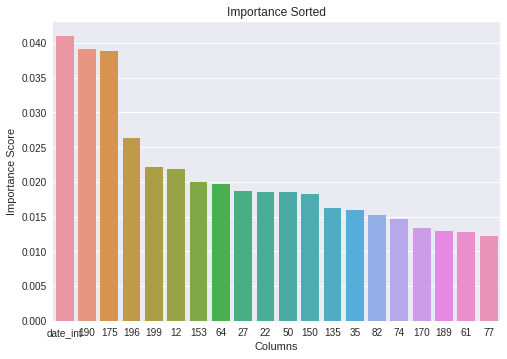

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

importantCols = pd.Series(f_cov.feature_importances_,index=list(X_COV)).sort_values(ascending=False)
sns.barplot(y=importantCols[:20], x=importantCols.index[:20])

plt.ylabel('Importance Score')
plt.xlabel('Columns')
plt.title("Importance Sorted")
plt.legend()
plt.show()

### 7.15 Interpretation

As shown above "`date_int`"  is one of the most important feature in determining whether or not the news has high news coverage. This is expected since the date the news has been posted definitely impacts on whether the news has sufficient coverage from peer articles. Some of the numeric (word2vec) columns  have significant impact on the prediction of the coverage score. But, since these factors are latent, they do not correspond to specific words in the vocabulary.

### 7.16 Other Methods Tried
Also tried using TFIDF as well as shown below.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

ktdv = TfidfVectorizer()
  
data_kaggle['text_distilled_joined'] = data_kaggle[ 'text_distilled' ].apply( lambda x :  ' '.join( x ) )
ktdv.fit( data_kaggle[ 'text_distilled_joined' ])
dim_row = len(ktdv.transform([data_kaggle[ 'text_distilled_joined' ][0]]).toarray())
dim_col = len(ktdv.transform([data_kaggle[ 'text_distilled_joined' ][0]]).toarray()[0])
# Eventually dropped

### 7.17 Extension - Increase  the window to 2 Months

Now that we have coverage of 5 and above for 6/100 articles. We can try and see what values we see if the coverage is increased from 30 days to 60 days

In [0]:
def coverage60( article ):
   fromdate, todate = window( article[ 'date' ], 60 )
   selected_coverage = all_kaggle[(all_kaggle['date'] > fromdate) & (all_kaggle['date'] < todate)]
   selected_coverage['covered'] = selected_coverage.apply( lambda r: r[ 'topics' ][0] in article.topics and
                                                       r[ 'topics' ][1] in article.topics, axis=1 )
   return len(selected_coverage[selected_coverage['covered'] == True])

data_kaggle[ 'coverage60' ] = data_kaggle.apply( coverage60, axis=1 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
data_kaggle.sort_values(by=['coverage'], ascending=False ).head(20)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,text_distilled_lemma,topics,date,coverage,topic_0,topic_1,text_distilled_joined,sentiment,date_int,coverage60
53,a36405a8d7d32c2192b9a9b482dcf0ebc83c62eb,0,Mike Rivero,2016-11-23T00:49:00.000+02:00,FLASHBACK - Hillary Clinton’s ‘KKK’ Smear Agai...,"November 21, 2016 By 21wire Leave a Comment \n...",english,2016-11-23T01:36:58.899+02:00,21stcenturywire.com,US,...,"[flashback, hillary, clinton, s, kkk, smear, a...","[mr , trump]",2016-11-23,41,"[0.6522071361541748, -0.6524747014045715, -0.3...","[0.5466837882995605, -0.2601611018180847, -0.3...",flashback hillary clinton kkk smear trump demo...,"{'neg': 0.141, 'neu': 0.737, 'pos': 0.122, 'co...",201611,118
26,c1a86b752a21196a06591d5a785fa29b14fab245,0,EdJenner,2016-11-22T08:17:53.961+02:00,DONALD TRUMP Calls Meeting With Press…Dresses ...,Go to Article \nThey had to know they had it c...,english,2016-11-22T08:17:53.961+02:00,100percentfedup.com,US,...,"[donald, trump, call, meeting, with, press, dr...","[trump , said]",2016-11-22,23,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.5603877305984497, -0.5979061126708984, -0.2...",donald trump calls meeting press dresses real ...,"{'neg': 0.217, 'neu': 0.719, 'pos': 0.064, 'co...",201611,67
980,29aa6e6c0aa6e47a2ee80e18b8ddc031657425b0,0,NaN,2016-10-28T18:34:48.985+03:00,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,english,2016-10-28T18:34:48.985+03:00,awdnews.com,DE,...,"[fear, of, trump, bush, obama, clinton, all, b...","[trump , clinton]",2016-10-28,20,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.2085878998041153, -0.05753529816865921, -0....",fear trump bush obama clinton buying property ...,"{'neg': 0.107, 'neu': 0.745, 'pos': 0.148, 'co...",201610,97
988,b2e81b8debd3ca29f942d34b781126c07e427194,0,NaN,2016-10-28T18:40:18.626+03:00,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,english,2016-10-28T18:40:18.626+03:00,awdnews.com,DE,...,"[fear, of, trump, bush, obama, clinton, all, b...","[trump , clinton]",2016-10-28,20,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.2085878998041153, -0.05753529816865921, -0....",fear trump bush obama clinton buying property ...,"{'neg': 0.107, 'neu': 0.745, 'pos': 0.148, 'co...",201610,97
631,7e8e053bbe2ed4978c6b8a69c58fb0441fd4cbf8,0,Alex Ansary,2016-10-31T19:54:37.665+02:00,Get Ready For Civil Unrest,Get Ready For Civil Unrest 10/31/2016 \nECONOM...,english,2016-10-31T19:54:37.665+02:00,amtvmedia.com,US,...,"[get, ready, for, civil, unrest, get, ready, f...","[trump , clinton]",2016-10-31,18,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.2085878998041153, -0.05753529816865921, -0....",get ready civil unrest get ready civil unrest ...,"{'neg': 0.171, 'neu': 0.686, 'pos': 0.143, 'co...",201610,95
968,cb64c208ace64bd6dbe9f5d8a892f510e3ae5dec,0,NaN,2016-10-28T00:14:00.000+03:00,Donald Trump threatens to jail Hillary Clinton,Email \nThe second presidential debate flew of...,english,2016-10-28T08:22:41.010+03:00,awdnews.com,DE,...,"[donald, trump, threatens, to, jail, hillary, ...","[trump , said]",2016-10-28,18,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.5603877305984497, -0.5979061126708984, -0.2...",donald trump threatens jail hillary clinton em...,"{'neg': 0.112, 'neu': 0.734, 'pos': 0.154, 'co...",201610,63
964,a0ef6632a41fb4d8d6cb1f1c4b86730cc62bf8c4,0,NaN,2016-10-27T21:14:42.630+03:00,Donald Trump threatens to jail Hillary Clinton,Email \nThe second presidential debate flew of...,english,2016-10-27T21:14:42.630+03:00,awdnews.com,DE,...,"[donald, trump, threatens, to, jail, hillary, ...","[trump , said]",2016-10-27,17,"[0.5466837882995605, -0.2601611018180847, -0.3...","[0.5603877305984497, -0.5979061126708984, -0.2...",donald trump threatens jail hillary clinton em...,"{'neg': 0.112, 'neu': 0.734, 'pos': 0.154, 'co...",201610,62
959,62a33ca2aa94dede521

Counting number of articles with coverage scores above 1

In [0]:
len(data_kaggle[data_kaggle['coverage60']>1])

94

### 7.18 Testing on Non-Fake News

The coverage scores (with window = 60 days) are compared between fake news dataset and "All news" non-fake news dataset. Since window of 60 days are chosen for fake news dataset, the same window is chosen for non-fake datasets for consistency.

In [0]:
non_fake_data = all_kaggle[:100]

non_fake_data[ 'coverage60' ] = non_fake_data.apply( coverage60, axis=1 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
non_fake_data.sort_values(by=['coverage60'], ascending=False ).head(40)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,text_distilled,topics,coverage60
43,43,17334,Trump Appears to Side With Assange Over Intell...,New York Times,"Scott Shane, Maggie Haberman and Julie Hirschf...",2017-01-05,2017.0,1.0,NaN,■ Donald J. Trump appears to side with the W...,"[trump, appears, side, assange, intelligence, ...","[mr , trump]",155
93,93,17392,Trump Takes on Democrats and Health Law in New...,New York Times,Julie Hirschfeld Davis,2017-01-06,2017.0,1.0,NaN,WASHINGTON — Donald J. Trump lashed out a...,"[trump, take, democrat, health, law, new, twit...","[mr , trump]",155
12,12,17295,"Mar-a-Lago, the Future Winter White House and ...",New York Times,Maggie Haberman,2017-01-02,2017.0,1.0,NaN,"WEST PALM BEACH, Fla. — When Donald J. Tr...","[mar, lago, future, winter, white, house, home...","[mr , trump]",152
77,77,17373,"Enough With the Tweets, China’s State Media Te...",New York Times,Chris Buckley,2017-01-05,2017.0,1.0,NaN,BEIJING — China’s leaders thought they had ...,"[enough, tweet, china, state, medium, tell, tr...","[trump , mr]",75
10,10,17293,Weak Federal Powers Could Limit Trump’s Climat...,New York Times,Justin Gillis,2017-01-03,2017.0,1.0,NaN,With Donald J. Trump about to take control of ...,"[weak, federal, power, could, limit, trump, cl...","[trump , mr]",75
17,17,17301,"Modi’s Cash Ban Brings Pain, but Corruption-We...",New York Times,Geeta Anand,2017-01-02,2017.0,1.0,NaN,"MUMBAI, India — It was a bold and risky gam...","[modi, cash, ban, brings, pain, corruption, we...","[mr , said]",45
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","[kim, jong, un, say, north, korea, preparing, ...","[north , korea]",19
29,29,17317,The Afghan War and the Evolution of Obama - Th...,New York Times,Mark Landler,2017-01-17,2017.0,1.0,NaN,WASHINGTON — President Obama’s advisers wre...,"[afghan, war, evolution, obama, new, york, tim...","[mr , obama]",15
16,16,17300,Dylann Roof Himself Rejects Best Defense Again...,New York Times,Kevin Sack and Alan Blinder,2017-01-02,2017.0,1.0,NaN,pages into the journal found in Dylann S. ...,"[dylann, roof, reject, best, defense, executio...","[mr , roof]",6
62,62,17355,"Dylann Roof, Addressing Court, Offers No Apolo...",New York Times,Alan Blinder and Kevin Sack,2017-01-06,2017.0,1.0,NaN,"CHARLESTON, S. C. — Seeming to abdicate one...","[dylann, roof, addressing, court, offer, apolo...","[mr , roof]",6


Counting the number of articles with coverage score greater than 1,

In [0]:
len(non_fake_data[non_fake_data['coverage60']>1])

28

### 7.19 Comparisons between Fake and Non-Fake News Datasets

Based on sample of 100 articles from pool of fake and non-fake news sources, the coverage score for non-fake news articles are significantly higher than the fake news articles. In particular, around 30 out of 100 of non-fake news articles had coverage score greater than one. On the other hand, only 14 out of 100 of fake news articles had coverge score greater than one. 


In [0]:
# For caculating approximate time to process notebook (IGNORE)
import datetime
datetime.datetime.now()

datetime.datetime(2018, 12, 9, 20, 12, 25, 933372)

## 8 Political Spectrum 

### 8.1 Goals

For political spectrum/bias we focus on whether the article is politically biased from 0 being centrist/neutral and 10 being right-most or left-most.

The key is to use supervised learning to determine whether the political pieces are democratic or republicans based on the words. 

We use the following dataset from Kaggle, (Eight, 2016)
https://www.kaggle.com/crowdflower/political-social-media-posts

The aim is to leverage the partisan or neutral rating of each social media post as foundation of our supervised learning.


### 8.2 TF-IDF

TF-IDF analysis is performed to convert texts from each social media posts to vectors. We also used the pre-populated columns of the social media posts to come up with the political bias score.

### 8.3 Data Enrichment

In [0]:
def get_parsed_data_2(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8', errors='ignore')), sep=sep, header=header )

POLITICAL_DATASET = 'https://github.com/h7shin/political_social_media/blob/master/political_social_media.csv?raw=true'

political_data = get_parsed_data_2(POLITICAL_DATASET, ',' , 'infer' )[:10000]

Let us check the columns

In [0]:
political_data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'orig__golden',
       'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'label',
       'message_gold', 'source', 'text'],
      dtype='object')

Let us check the first five rows

In [0]:
 political_data.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [0]:
political_data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'orig__golden',
       'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'label',
       'message_gold', 'source', 'text'],
      dtype='object')

### 8.4 Political Bias Scoring

For the purposes of computing political bias, a weight for each feature is assigned along with rationale. The rationale is heavily based on the description of each values of each column from the Kaggle website.

In [0]:
def BiasEncoder( bias ):
   if bias == 'neutral':
      return 0
   elif bias == 'partisan':
      return 1
    
def MessageEncoder( message ):
   return {
        'attack' : 12,          # Rationale: attacking another politician clear indication of high political (partisanship) score
        'mobilization' : 6,     # rationale: designed to mobilize supports, clear indication of high political score
        'support' : 5,          # Rationale: message of politcal support is a good indication of high political score
        'policy' : 4,           # Rationale: discussion of political policy is a modest indication of high political score
        'media' : 3,            # Rationale: Interaction with media has some indication of high political score
        'other' : 3,            # Rationale: We don't know (either way)       
        'constituency' : 2,     # Rationale: Discussion of political constintuency is a poor indication of high political score
        'personal': 1,          # Rationale: Condolences and sympathy are clear indication of low political score
        'information' : 0 }[ message ]

def AudienceEncoder( audience ):
   return {
       'constituency' : 2,      # Rationale: Address to political constituency has higher political/partisanship score than address to national audience
       'national' : 1
       }[ audience ]
       
political_data['biasNumeric'] = political_data.bias.apply(BiasEncoder)
political_data['messageNumeric'] = political_data.message.apply(MessageEncoder)    
political_data['audienceNumeric'] = political_data.audience.apply(AudienceEncoder)       

Now we compute the overall political spectrum score. The weights are adjusted to optimize the prediction accuracy.

In [0]:
political_data['political'] = round(political_data['biasNumeric']*30*political_data['bias:confidence'] + political_data['messageNumeric']*5 +  political_data['audienceNumeric']*5)

### 8.5 Multi-class Classification

Checking the distribution, the boundaries are chosen to allocate each article to corresponding bin evenly. With just raw scores from 1 to 100, accuracy score can be poor (TF-IDF + MultinomialNB). As a result, a continuous range is reduced to a set to four discrete classes (0 - 3) .

Text(0,0.5,'Count')

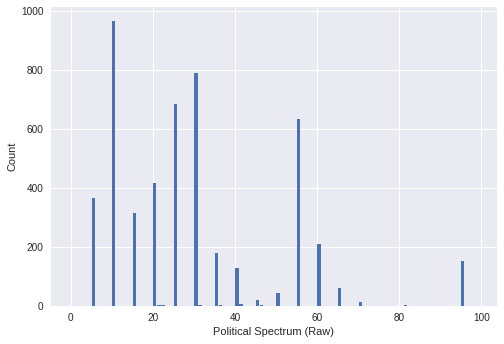

In [0]:
import matplotlib.pyplot as plt

bins = range(100)
plt.hist(political_data.political, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Political Spectrum (Raw)" )
plt.ylabel( "Count")

Applying the boundary ranges `[0-20)`, `[20-40)`, `[40-80)`, and `[80-100)`,

In [0]:
def categorize( raw_score ):
  
   if raw_score < 20:
      ret = 0
   elif raw_score < 40:
      ret = 1
   elif raw_score < 80:
      ret = 2
   elif raw_score <= 100:
      ret = 3
   return ret
    
political_data['politicalDiscrete'] = political_data['political'].apply( categorize )

In [0]:
political_data.politicalDiscrete[0]

2

To illustrate how the rows are split and distributed using the following historgram,

Text(0,0.5,'Count')

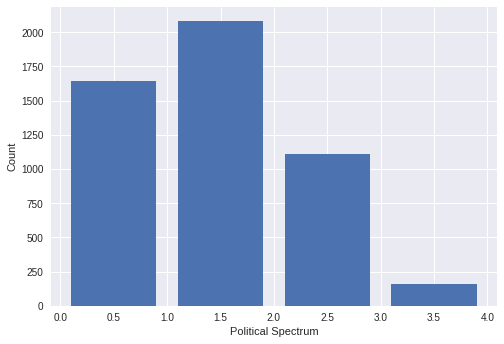

In [0]:
import matplotlib.pyplot as plt

bins = [0, 1, 2, 3, 4 ]
plt.hist(political_data.politicalDiscrete, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Political Spectrum" )
plt.ylabel( "Count")

In [0]:
political_data.head(15)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,id,label,message_gold,source,text,biasNumeric,messageNumeric,audienceNumeric,political,politicalDiscrete
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0000,policy,...,3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,1,4,1,55.0,2
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0000,attack,...,3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,1,12,1,95.0,3
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0000,support,...,3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...,0,5,1,30.0,1
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0000,policy,...,2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,0,4,1,25.0,1
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0000,policy,...,4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...,1,4,1,55.0,2
5,766192489,False,finalized,2,8/4/15 21:06,national,1.0,partisan,0.5216,information,...,4.2103E+17,From: Heidi Heitkamp (Senator from North Dakota),NaN,twitter,Called on the @USDOTFRA to release info about ...,1,0,1,21.0,1
6,766192490,False,finalized,1,8/4/15 21:07,national,1.0,neutral,1.0000,mobilization,...,4.89407E+17,From: Frederica Wilson (Representative from Fl...,NaN,twitter,"@BBCWorld, help us keep the kidnapped Nigerian...",0,6,1,35.0,1
7,766192491,False,finalized,1,8/4/15 20:51,constituency,1.0,neutral,1.0000,mobilization,...,3.27182E+17,From: Ron Barber (Representative from Arizona),NaN,twitter,Show your Arizona pride-choose your favorite S...,0,6,2,40.0,2
8,766192492,False,finalized,1,8/4/15 20:57,national,1.0,neutral,1.0000,personal,...,5.37292E+17,From: Chuck Fleischmann (Representative from T...,NaN,twitter,What a wonderful night at State Senator Ken Ya...,0,1,1,10.0,0
9,766192493,False,finalized,2,8/4/15 21:14,national,1.0,partisan,1.0000,support,...,2.98815E+17,From: Steny Hoyer (Representative from Maryland),NaN,twitter,Great op-ed by Pres. Clinton about signing #FM...,1,5,1,60.0,2


### 8.6 Distillation - Tokenization

As done in previous sections, standard distillation steps are applied to the new dataset.

In [0]:
political_data.text[:4]

0    RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1    VIDEO - #Obamacare:  Full of Higher Costs and ...
2    Please join me today in remembering our fallen...
3    RT @SenatorLeahy: 1st step toward Senate debat...
Name: text, dtype: object

In [0]:
political_data['text_distilled'] = political_data['text'].apply(lambda x : re.split('\W+', str(x).lower()))

In [0]:
political_data.text_distilled[:4]

0    [rt, nowthisnews, rep, trey, radel, r, fl, sla...
1    [video, obamacare, full, of, higher, costs, an...
2    [please, join, me, today, in, remembering, our...
3    [rt, senatorleahy, 1st, step, toward, senate, ...
Name: text_distilled, dtype: object

### 8.7 Distillation - Lemmatization

In [0]:
political_data['text_distilled'] = political_data['text_distilled'].apply(lemmatize)

### 8.8 Distillation - Remove Stop Word

In [0]:
political_data['text_distilled'] = political_data['text_distilled'].apply(remove_stopwords)

### 8.9 Distillation - Remove Non-English Words

In the text, there were a number of tokens that are non valid english words such as "rt", "nowthisnews", "r", etc.
non-English words are removed from the text.

In [0]:
nltk.download('words')
from nltk.corpus import words
english = set(words.words())

def remove_nonenglish(text):
   new_text = []
   for word in text:
      if word in english:
         new_text.append( word )
   return new_text

political_data['text_distilled'] = political_data['text_distilled'].apply(remove_nonenglish)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


### 8.10 Distillation - Back to String/Text Form

The distileld list of tokens are converted back to text joined by spaces for TF-IDF modelling.

In [0]:
def joiner( tokens ):
   return ' '.join( tokens )
  
political_data['text_distilled'] = political_data['text_distilled'].apply(joiner)

In [0]:
political_data.text_distilled[:4]

0                             rep trey r slam politics
1                video full higher cost broken promise
2    please join today fallen hero men woman curren...
3    step toward senate debate bill senate procedur...
Name: text_distilled, dtype: object

### 8.11 Count Vectorizer

Count vectorizer from (https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/) was applied to the dataset. Eventually, TF-IDF is chosen over count vectorizer due to its ability to apply importance to specific terms over stop words.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit( political_data[ 'text' ])
    
def vectorTransform( text ):
   return v.transform([text])[0]
  
political_data['countVector'] = political_data[ 'text' ].apply( vectorTransform )

In [0]:
political_data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,message_gold,source,text,biasNumeric,messageNumeric,audienceNumeric,political,politicalDiscrete,text_distilled,countVector
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,1,4,1,55.0,2,rep trey r slam politics,"(0, 3973)\t1\n (0, 6729)\t1\n (0, 8239)\t1..."
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,1,12,1,95.0,3,video full higher cost broken promise,"(0, 1917)\t1\n (0, 3126)\t1\n (0, 3973)\t1..."


### 8.12 Using TF-IDF Vectorizer

TD-IDF optimizes by diminishing the significance of stop words, and prioritize words that are frequent **within** the document, relative to the entire corpus.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdv = TfidfVectorizer()
tdv.fit( political_data[ 'text' ])
dim_row = len(tdv.transform([political_data[ 'text' ][0]]).toarray())
dim_col = len(tdv.transform([political_data[ 'text' ][0]]).toarray()[0])

misscount = 0
def vectorTFidTransform( text ):
   if len(  tdv.transform([text]).toarray() ) == dim_row:
      if len(  tdv.transform([text]).toarray()[0] ) == dim_col: 
         return list(tdv.transform([text]).toarray()[0])
   misscount += 1
   return np.zeros(dim_col)
  
political_data['tfidVector'] = political_data[ 'text' ].apply( vectorTFidTransform )
dim_row, dim_col, misscount

(1, 18073, 0)

In [0]:
tdv.vocabulary_

{'rt': 14143,
 'nowthisnews': 11491,
 'rep': 13588,
 'trey': 16408,
 'radel': 13161,
 'fl': 6729,
 'slams': 14951,
 'obamacare': 11595,
 'politics': 12530,
 'https': 8239,
 'co': 3973,
 'zvywmg8yih': 18068,
 'video': 17099,
 'full': 7027,
 'of': 11674,
 'higher': 7977,
 'costs': 4509,
 'and': 1917,
 'broken': 3126,
 'promises': 12874,
 'http': 8238,
 'dn3vzqirwf': 5461,
 'please': 12474,
 'join': 9096,
 'me': 10498,
 'today': 16215,
 'in': 8489,
 'remembering': 13551,
 'our': 11901,
 'fallen': 6469,
 'heroes': 7939,
 'honoring': 8114,
 'the': 16014,
 'men': 10585,
 'women': 17652,
 'currently': 4745,
 'military': 10730,
 'service': 14651,
 'for': 6836,
 'their': 16037,
 'sacrifices': 14232,
 'senatorleahy': 14577,
 '1st': 427,
 'step': 15376,
 'toward': 16296,
 'senate': 14555,
 'debate': 4934,
 'on': 11765,
 'leahy': 9679,
 'crapo': 4600,
 'vawa': 17009,
 'bill': 2742,
 'is': 8855,
 'procedural': 12809,
 'vote': 17193,
 'at': 2243,
 '30': 657,
 'pm': 12490,
 'amazon': 1841,
 'delivery

In [0]:
political_data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,source,text,biasNumeric,messageNumeric,audienceNumeric,political,politicalDiscrete,text_distilled,countVector,tfidVector
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,1,4,1,55.0,2,rep trey r slam politics,"(0, 3973)\t1\n (0, 6729)\t1\n (0, 8239)\t1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,1,12,1,95.0,3,video full higher cost broken promise,"(0, 1917)\t1\n (0, 3126)\t1\n (0, 3973)\t1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### 8.13  Prediction Algorithm (Multinomial Naive Bayes)

MultinomialNB classifier is trained to predict political spectrum (column "political")  from the tfidf values. MultinomialNB model is used to map the fake and non-fake news articles to political bias score.

In [0]:
len( political_data[ 'tfidVector' ] )

5000

In [0]:
len( political_data[ 'politicalDiscrete' ] )

5000

In [0]:
political_data['tfidVector'][:20]

0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
11    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
12    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
14    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
16    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [0]:
political_data['politicalDiscrete'][:20]

0     2
1     3
2     1
3     1
4     2
5     1
6     1
7     2
8     0
9     2
10    2
11    3
12    1
13    0
14    0
15    2
16    0
17    1
18    1
19    2
Name: politicalDiscrete, dtype: int64

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X = political_data[ 'tfidVector' ]
Y = political_data[ 'politicalDiscrete' ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
len( X_train ), len( Y_train )

(3350, 3350)

Using MultinomialNB, we can create a classifier (alpha is chosen to optimize accuracy).  Multinomial NB gave the best overal accuracy.

In [0]:
m  = MultinomialNB(alpha=0.001)
m.fit( X_train.tolist(), Y_train.tolist() )

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [0]:
predicted = m.predict( X_test.tolist())

In [0]:
predicted

array([2, 0, 2, ..., 2, 0, 1])

In [0]:
from sklearn import metrics

'Accuracy', metrics.accuracy_score(Y_test, predicted)

('Accuracy', 0.4212121212121212)

In [0]:
metrics.confusion_matrix(y_test, y_pred)

array([[298,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

### 8.14 Random Forrest Classifier

Using a different classifier to see if it possible to get a better accuracy score,


In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

train: (3350,)
test: (1650,)


In [0]:
f = RandomForestClassifier(n_estimators=10)
f.fit(X_train.tolist(),y_train.tolist())
y_pred = f.predict(X_test.tolist())


In [0]:
'Accuracy', metrics.accuracy_score(y_test, y_pred)

('Accuracy', 0.41515151515151516)

In [0]:
metrics.confusion_matrix(y_test, y_pred)

array([[220, 301,  38,   0],
       [223, 409,  60,   1],
       [ 74, 211,  55,   2],
       [  9,  31,  15,   1]])

### 8.15  Using SVM Classifier

Now let us use a different classifier to see if we get a better accuracy score.

In [0]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

train: (3350,)
test: (1650,)


In [0]:
t = SVC()
t.fit(X_train.tolist(),y_train.tolist())
y_pred = t.predict(X_test.tolist())

In [0]:
'Accuracy', metrics.accuracy_score(y_test, y_pred)

('Accuracy', 0.42)

### 8.16 Applying to Fake News Dataset

Applying the trained model (multinomial NB) onto unseen data in the fake news dataset,

In [0]:
data_kaggle[ 'text_distilled' ] = data_kaggle[ 'text_distilled' ].apply( remove_nonenglish )
data_kaggle[ 'text_distilled_joined' ] = data_kaggle[ 'text_distilled' ].apply( lambda x : ' '.join(x) )
data_kaggle[ 'text_distilled_joined' ]

0      busted stole millions print pay back money plu...
1      attorney general lynch plead fifth attorney ge...
2      breaking investigation red state fox news morn...
3      pin drop speech father daughter j trump prison...
4      fantastic trump point plan reform bombshell re...
5      goes absolutely berserk protester rally video ...
6      breaking ready make case island least times mo...
7      wow chilling story massive voter fraud trump c...
8      breaking last minute trick energize base said ...
9      evil yell f trump burn truck daddy fishing yr ...
10                                       goes dean video
11     say leave u let hold comedian would move buy h...
12     give safe cry trump win threaten pro trump exp...
13     boom math trump would beaten election republic...
14     boom president handled negotiate negotiate vid...
15     trump supporter got reporter covering anti tru...
16     special message said move canada trump video c...
17     punch trump face anti tr

Text(0,0.5,'Count')

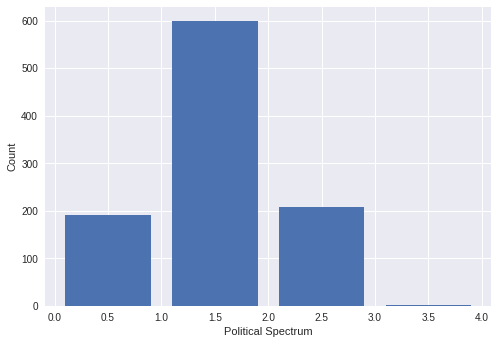

In [0]:
XB = data_kaggle[ 'text_distilled_joined' ].apply( vectorTFidTransform )

predicted = m.predict( XB.tolist())
plt.hist(predicted, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Political Spectrum" )
plt.ylabel( "Count")

### 8.17 Using doc2vec

Using term frequency approach (TF-IDF) we get many entries with very sparse vectors. Because the resultant vectors are difficult to distinguish we have very low resultant accuracy score. word2vec may give us more dense vectors to work with. However, word2vec is specific to individual words. To apply at tocument/text level we should use doc2vec. Let us use doc2vec to see if we get better prediction model.

The key with doc2vector is to have large dimension, and use random forrest with many subtrees.

In [0]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

def taggedDocuments( text ):
   return TaggedDocument(words=text.split(), tags=[u'a']) 
  
political_data[ 'text_distilled_tagged' ] = political_data.text_distilled.apply( taggedDocuments )
   
m = Doc2Vec( political_data[ 'text_distilled_tagged' ], dm=0, epoch=100, alpha=0.3, size= 800, min_alpha=0.025)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Test the model with some test words.

In [0]:
m.most_similar('test')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sustainable', 0.15260544419288635),
 ('warning', 0.12006232142448425),
 ('little', 0.10804597288370132),
 ('meet', 0.10648909211158752),
 ('sell', 0.09959084540605545),
 ('make', 0.09690513461828232),
 ('dealing', 0.09671814739704132),
 ('helping', 0.09656314551830292),
 ('gilbert', 0.09463967382907867),
 ('remain', 0.0939127653837204)]

In [0]:
m.most_similar('issue')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('minimum', 0.11455125361680984),
 ('energy', 0.1042715460062027),
 ('choose', 0.1012926772236824),
 ('way', 0.10079152882099152),
 ('pete', 0.09716001152992249),
 ('coalition', 0.0961112231016159),
 ('remind', 0.09480765461921692),
 ('quickly', 0.0942106544971466),
 ('productive', 0.09287691116333008),
 ('dark', 0.09286034107208252)]

Now train the model using doc2vec

In [0]:
import numpy as np

def encodeFirstColumn( text ):
   return m.infer_vector( text.split(), alpha=0.1, epochs=1 )
   
political_data[ 'vector' ] = political_data.text_distilled.apply( encodeFirstColumn )

Verify the contents of `political_Data['vector']`

In [0]:
political_data[ 'vector' ].head(5)

0    [0.02627542, -0.010603811, 0.008526943, -0.012...
1    [0.047775775, -0.019378832, 0.012831894, -0.02...
2    [0.046100736, -0.017791303, 0.009148796, -0.02...
3    [0.00013170607, -0.0013320881, -0.0031535323, ...
4    [0.06406267, -0.028716525, 0.012423496, -0.035...
Name: vector, dtype: object

In [0]:
for i in range( len( political_data[ 'vector' ] ) ):
   assert len(political_data[ 'vector' ][0]) == len(political_data[ 'vector' ][i]) 

### 8.18. Using Random Forrest Classifier on Doc2vec Embeddings

Let us now use Random Forrest Classifier on Doc2Vec Embeddings

In [0]:
# First split the vectors of word2vec into individual columns

X_D2V_prep = political_data[['vector']]
d2vector_dim = len(X_D2V_prep.vector[0])

def select(d2vec, idx):
   return d2vec[idx]

d2v_prep_dict = {}
for i in range( d2vector_dim ):
   d2v_prep_dict[str(i)] = []
    
X_D2V = pd.DataFrame(d2v_prep_dict)

for i in range( d2vector_dim ):
   X_D2V[str(i)] = X_D2V_prep.vector.apply( lambda x : select(x, i ) )
    
X_D2V.head(1)

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,0.026275,-0.010604,0.024562,-0.002734,0.001917,-0.068802,-0.006514,-0.036223,-0.059496,-0.002922,...,-0.032039,-0.022412,0.022635,-0.035098,-0.027277,0.021377,0.06749,-0.016717,0.042036,-0.064385


Now let us get the labels (Y)

In [0]:
Y_D2V = political_data['politicalDiscrete']

Using Random Forrest Classifier,

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2V, Y_D2V, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

train: (3350, 800)
test: (1650, 800)


In [0]:
f = RandomForestClassifier(n_estimators=100)
f.fit(X_train,y_train)
y_pred = f.predict(X_test)

Accuracy score is around 40%, as shown below

In [0]:
'Accuracy', metrics.accuracy_score(y_test, y_pred)

('Accuracy', 0.44)

In [0]:
# For caculating approximate time to process notebook (IGNORE)
import datetime
datetime.datetime.now()

datetime.datetime(2018, 12, 9, 20, 23, 4, 200678)

## 9 Preparing for the Polynomial (News Coverage Score)

To prepare for polynomial equation, we should apply the rank to the combined dataset of fake and non-fake news, prepared by Gene. Here are several reasons news coverage score has been chosen:

- More accurate model
- Clear difference between all news data set and fakenews dataset
- Interest of time and resources

#### 9.1 Cleaning Up Exiting Data

In [0]:
# Clean up some existing data

all_kaggle = all_kaggle.iloc[0:0]
data_kaggle = data_kaggle.iloc[0:0] 

NameError: ignored

### 9.2 Uniform Data Preparation (By Gene)

We need to apply our trained model on Gene's prepared data. No training is required. We just need to apply our model to this dataset.

In [0]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.9MB/s 
    100% |████████████████████████████████| 1.4MB 16.9MB/s 
    100% |████████████████████████████████| 133kB 29.2MB/s 
    100% |████████████████████████████████| 61kB 24.4MB/s 
    100% |████████████████████████████████| 5.1MB 7.3MB/s 
    100% |████████████████████████████████| 552kB 24.8MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
##### PREPARED BY GENE #####
# dependencies
import pandas as pd
import nltk
import numpy as np
import io
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
# from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2
from string import punctuation
from nltk import PorterStemmer
import copy 
import re, math
from sklearn.model_selection import train_test_split
from nltk import WordNetLemmatizer
from nltk import bigrams
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
import pickle
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
##### PREPARED BY GENE #####
def get_parsed_data2(url):
    return pd.read_csv(io.StringIO(requests.get(url, verify=False).content.decode('utf-8')), sep=',', header='infer')

# download and parse the dataset...
data_kg_fake_news = get_parsed_data2('https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle/kaggle-fake.csv')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
##### PREPARED BY GENE #####
data_kg_nonfake_news = get_parsed_data2('https://dock2.hyunwookshin.com/public/cmpe257_a1/articles1.csv')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
#### PREPARED BY GENE (MODIFIED) #####
def tokenize2(text):
    cachedStopWords = set(stopwords.words('english') + list(punctuation))
    min_length = 3
    # tokenize
    # convert to lower case
    words = map(lambda word: word.lower(), word_tokenize(text))
    # remove stop words
    words = [word for word in words if word not in cachedStopWords]
    # steming
    #tokens = list(map(lambda token: PorterStemmer().stem(token), words))
    # lemmatize
    lemmas = [WordNetLemmatizer().lemmatize(word) for word in words]
    # only focus on alphabetic words
    p = re.compile('[a-zA-Z]+')
    
    filtered_lemmas = list(filter(lambda lemma: p.match(lemma) and len(lemma) >= min_length, lemmas))
    return filtered_lemmas


In [0]:
### PREPARED BY GENE (MODIFIED)
data_kg_nonfake_news.rename(columns={"content": "text"}, inplace=True)
data_kg_nonfake_news['type'] = 0
data_kg_fake_news.loc[data_kg_fake_news['type']!='bs', 'type'] = 0
data_kg_fake_news.loc[data_kg_fake_news['type']=='bs', 'type'] = 1


### From Earlier Part of the assignment
def setDate( published ):
   return published.split( "T" )[0]
  
data_kg_fake_news[ 'date' ] = data_kg_fake_news.published.apply( setDate )

all_data = pd.concat([data_kg_fake_news[['date', 'title','text','type']], data_kg_nonfake_news[['date', 'title','text','type']]])

In [0]:
all_data.type.value_counts()

0    51507
1    11492
Name: type, dtype: int64

In [0]:
all_data_to_export = all_data[["title"]]
all_data_to_export.to_csv('all_data_mini.csv', 'w' )
from google.colab import files

files.download('all_data_mini.csv')

In [0]:
##### PREPARED BY GENE #####
all_data['text_clean']=all_data['text'].astype('U').apply(tokenize2)
#all_data['title_clean']=all_data['title'].astype('U').apply(tokenize2)

Please refer to section 7.9 - 14 for explanations

In [0]:
all_data.text_clean.head(2)

In [0]:
all_data.type.value_counts()

### 9.3 Applying LDA (as done before)

In [0]:
#all_data['text_distilled'] = all_data[ 'text_clean' ].apply( lambda x : x.split())
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    if len( tokenized_words ) == 0 :
      return []
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    m = LdaModel(c, num_topics=1, id2word=d)
    return list(m.print_topics(num_words=2))
  
all_data['topics'] = all_data['text_clean'].apply(topics)


In [0]:
all_data['topics'].head(20)

In [0]:

def parseTopics(topics):
   output = []
   if len( topics ) >= 1 :
      words = topics[0][1].split( '+' )
   else:
      return []
   for word in words:
       if '*' not in word:
           print(word)
           output.append( word )
       else:
           output.append( word.split('*')[1].replace( '"', '' ) )
   if len( output ) < 2:
      output.append( output[0] )
   if len( output ) != 2:
      return output[:2]
   if not isinstance( output[0], str ) or not isinstance( output[1], str ):
      print( output )
      assert isinstance( output[0], str )
      assert isinstance( output[1], str )
   return output

In [0]:
all_data['topics'] = all_data['topics'].apply(parseTopics)

### 9.4 Encoding Topics using word2vec (Same Practice)

In [0]:
m = Word2Vec( all_data[ 'text_clean' ] )
vector_dim = len(m[list(m.wv.vocab)[0]])

def encodeFirstColumn( topics ):
   if len(topics) == 0:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   topic = topics[0].strip()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
    
def encodeSecondColumn( topics ):
   if len(topics) == 0:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   topic = topics[0].strip()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
    
all_data[ 'topic_0' ] = all_data.topics.apply( encodeFirstColumn )
all_data[ 'topic_1' ] = all_data.topics.apply( encodeSecondColumn )

In [0]:
all_data.head(2)

In [0]:
all_data[ 'date_int' ] = all_data.date.apply( setNumericDate )

In [0]:
all_data.head(1)

,date,title,text,type,text_clean,topics,topic_0,topic_1,date_int
0,2016-10-26,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,0,"[print, pay, back, money, plus, interest, enti...","[government , group]","[0.33058086037635803, 2.121378183364868, 1.218...","[0.33058086037635803, 2.121378183364868, 1.218...",201610


In [0]:
for i in range( vector_dim ):
   all_data[str(i)] = all_data.topic_0.apply( lambda x : select(x, i ) )
    
for i in range( vector_dim ):
   all_data[str(vector_dim + i)] = all_data.topic_0.apply( lambda x : select(x, i ) )

In [0]:
all_data.head(2)

,date,title,text,type,text_clean,topics,topic_0,topic_1,date_int,0,...,190,191,192,193,194,195,196,197,198,199
0,2016-10-26,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,0,"[print, pay, back, money, plus, interest, enti...","[government , group]","[0.33058086037635803, 2.121378183364868, 1.218...","[0.33058086037635803, 2.121378183364868, 1.218...",201610,0.330581,...,-0.397654,0.025636,0.737945,2.932276,0.489395,3.265204,-0.984716,1.315373,0.548298,0.633810
1,2016-10-29,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,0,"[attorney, general, loretta, lynch, plead, fif...","[lynch , cash]","[-3.171513319015503, 2.4711062908172607, 0.836...","[-3.171513319015503, 2.4711062908172607, 0.836...",201610,-3.171513,...,-2.044656,-1.452841,-0.370701,-0.980904,1.364580,-0.213651,2.013889,2.158167,1.535949,1.817538


### 9.5 Generating coverage score

In [0]:
keys = [str(i) for i in range(200)]
X_Actual = all_data[['date_int'] + keys ]
Y_Predict = f_cov.predict(X_Actual)

In [0]:
all_data['Coverage'] = Y_Predict 

In [0]:
sorted(Y_Predict, reverse=True )[:10]

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18]

In [0]:
all_data.type.value_counts()

NameError: ignored

In [0]:
all_data.head(2)

,date,title,text,type,text_clean,topics,topic_0,topic_1,date_int,0,...,191,192,193,194,195,196,197,198,199,Coverage
0,2016-10-26,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,0,"[print, pay, back, money, plus, interest, enti...","[government , group]","[0.33058086037635803, 2.121378183364868, 1.218...","[0.33058086037635803, 2.121378183364868, 1.218...",201610,0.330581,...,0.025636,0.737945,2.932276,0.489395,3.265204,-0.984716,1.315373,0.548298,0.633810,0
1,2016-10-29,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,0,"[attorney, general, loretta, lynch, plead, fif...","[lynch , cash]","[-3.171513319015503, 2.4711062908172607, 0.836...","[-3.171513319015503, 2.4711062908172607, 0.836...",201610,-3.171513,...,-1.452841,-0.370701,-0.980904,1.364580,-0.213651,2.013889,2.158167,1.535949,1.817538,0


### 9.6 Exporting csv file

In [0]:
all_data_to_export = all_data[["title", "Coverage"]]
all_data_to_export.to_csv('all_data_coverage_condensed.csv', 'w' )

In [0]:
from google.colab import files

files.download('all_data_coverage_condensed.csv')

### 9.7 Plotting results for visualization

Text(0,0.5,'Count')

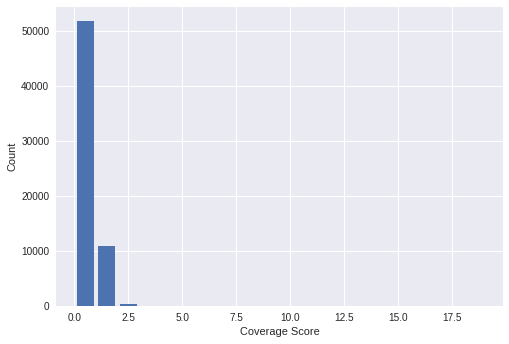

In [0]:
import matplotlib.pyplot as plt

bins = range(20)
plt.hist(all_data.Coverage, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Coverage Score" )
plt.ylabel( "Count")

Text(0,0.5,'Coverage Score')

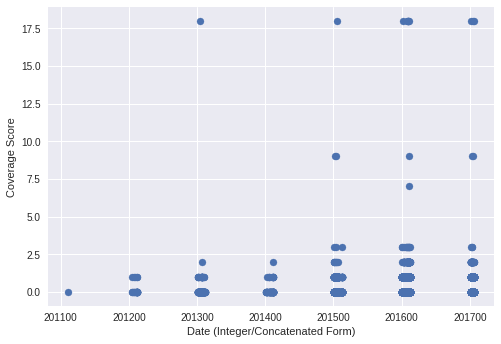

In [0]:
plt.scatter(all_data.date_int, all_data.Coverage )
plt.xlabel( "Date (Integer/Concatenated Form)" )
plt.ylabel( "Coverage Score" )

<h2>9 Works Cited</h2>

Arsanjani, A. (2018, November 18). Notes : [Notes under #weekly-notes on slack]. Retrieved November 20, 2018. 

Classifier comparison¶. (n.d.). Retrieved November 20, 2018, from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 

Eight, F. (2016, November 20). Political Social Media Posts. Retrieved November 20, 2018, from https://www.kaggle.com/crowdflower/political-social-media-posts 

Li, S. (2018, May 31). Topic Modeling and Latent Dirichlet Allocation (LDA) in Python. Retrieved November 20, 2018, from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

Martin, B., & Koufos, N. (n.d.). Sentiment Analysis on Reddit News Headlines with Python's Natural Language Toolkit (NLTK). Retrieved December 8, 2018, from https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

News API. (n.d.). News API - A JSON API for live news and blog articles. Retrieved November 20, 2018, from https://newsapi.org/ 

Risdal, M. (2016, November 25). Getting Real about Fake News. Retrieved November 20, 2018, from https://www.kaggle.com/mrisdal/fake-news 

Shu, K., Sliva, A., Wang, S., Tang, J., & Liu, H. (2017). Fake News Detection on Social Media. ACM SIGKDD Explorations Newsletter, 19(1), 22-36. doi:10.1145/3137597.3137600 

Thompson, A. (2017, August 20). All the news. Retrieved November 20, 2018, from https://www.kaggle.com/snapcrack/all-the-news 

Rehurek, R. (2018, September 20). Gensim: Topic modelling for humans. Retrieved December 4, 2018, from https://radimrehurek.com/gensim/models/doc2vec.html

Budhiraja, A. (2018, May 14). A simple explanation of document embeddings generated using Doc2Vec. Retrieved December 4, 2018, from https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da

Rachuta, K. (2016, May 27). Importing and exporting CSV files in Python – Kasia Rachuta – Medium. Retrieved December 9, 2018, from https://medium.com/@kasiarachuta/importing-and-exporting-csv-files-in-python-7fa6e4d9f408

RaRe-Technologies. (2018, October 4). RaRe-Technologies/gensim. Retrieved December 4, 2018, from https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/doc2vec.py

<h2> 10 Image Credits</h2>

Pixabay. (n.d.). Newspaper Lot. Retrieved November 20, 2018, from https://www.pexels.com/photo/administration-articles-bank-black-and-white-261949/ 

Rawpixel.com. (n.d.). Person Reading the Daily Fake News Newspaper Sitting on Gray Couch. Retrieved November 20, 2018, from https://www.pexels.com/photo/person-reading-the-daily-fake-news-newspaper-sitting-on-gray-couch-1327218/ 
